<h1>Garvika 202318061
<h1>Aditi 202318005
<h1>Jyoti 202318049
<h1>Kunj 202103018

## Necessary libraries


In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
!pip install pyecharts

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
#from pyecharts.charts import Bar, WordCloud
#from pyecharts import options as opts
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
#import catboost
import lightgbm
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from pyecharts.charts import Bar, WordCloud
from pyecharts import options as opts

## Importing data

In [230]:
path_2="/content/drive/MyDrive/ratings.csv"

In [231]:
path_1="/content/drive/MyDrive/myntra_excel.csv"

In [232]:
df_1=pd.read_csv(path_1,encoding='latin1')
df_1.head()

,uniq_id,crawl_timestamp,product_id,link,size,variant_sku,brand,care_instructions,dominant_material,title,...,size_fit,complete_the_look,type,variant_price,variant_compare_at_price,ideal_for,is_in_stock,inventory,specifications,Unnamed: 25
0,cc51c3dd925d9d84e2fb28c7918dbbc3,2019-08-11 05:49:46 +0000,6937673,https://www.myntra.com/tops/imara/imara-women-...,XL,6937673_XL,IMARA,Polyester | Dry-clean,Polyester,IMARA Women Black Solid Top,...,"The model (height 5'8"") is wearing a size S",Improve your personal style with a brand new t...,Clothing/Women/Tops/IMARA/More by IMARA,959,1599,Women,Out of Stock,0,Transparency : Opaque | Sleeve Styling : Bell ...,NaN
1,c7e2fe388a93dae5c86b50dd8a5dbd7a,2019-07-03 01:04:34 +0000,7441182,https://www.myntra.com/kurtas/house-of-pataudi...,XL,7441182_XL,House of Pataudi,100% cottonMachine-wash,cotton,House of Pataudi Men Black Printed Straight Kurta,...,The model (height 6') is wearing a size M,"From House of Pataudi, this kurta is a great w...",Clothing/Men/Kurtas/House of Pataudi/More by H...,799,1999,Men,In Stock,Shape : Straight | Sleeve Styling : Regular Sl...,NaN,NaN
2,76949d78057a633aace6246045eefd66,2019-07-15 09:43:31 +0000,9245141,https://www.myntra.com/pillows/the-white-willo...,S,9245141_S,The White Willow,Polycotton | Only spot clean by hand with warm...,Cotton,The White Willow Unisex Off-White Therapedic M...,...,Dimensions: 58.42 cm x 33.02 cm x 10.16 cm,The White Willow has been founded with the vis...,Home/Unisex/Pillows/The White Willow/More by T...,1399,2799,Unisex,In Stock,Number of Components : 1 | Material : Polycott...,NaN,NaN
3,5f83f6b51da1ef93bc0585577b6991e6,2019-07-15 14:11:14 +0000,1314889,https://www.myntra.com/dupatta/dupatta-bazaar/...,Onesize,1314889_Onesize,Dupatta Bazaar,Chiffon | Hand-wash,Chiffon,Dupatta Bazaar Pink Dupatta,...,Length: 2.3 metres Width: 1.1 metres,Complement your ethnic ensemble with this dupa...,Clothing/Women/Dupatta/Dupatta Bazaar/More by ...,349,499,Women,In Stock,Pattern : Solid | Occasion : Daily | Border : ...,NaN,NaN
4,890bf4355c319a4211296b9d3176d11f,2019-06-01 08:17:28 +0000,7705322,https://www.myntra.com/kurta-sets/manyavar/man...,S,7705322_S,Manyavar,Top fabric: Silk Blend | Bottom fabric: Silk B...,Silk,Manyavar Men Yellow & White Self Design Kurta ...,...,The model (height 6') is wearing a size M,"From Manyavar, this kurta is a great way to sh...",Clothing/Men/Kurta Sets/Manyavar/More by Manyavar,2999,2999,Men,Out of Stock,Occasion : Festive | Number of Components : 2 ...,NaN,NaN


In [233]:
ratings=pd.read_csv(path_2)
ratings.shape

(2419078, 4)

## Data analysis

In [234]:
df_1.columns

Index(['uniq_id', 'crawl_timestamp', 'product_id', 'link', 'size',
       'variant_sku', 'brand', 'care_instructions', 'dominant_material',
       'title', 'actual_color', 'dominant_color', 'product_type', 'images',
       'body', 'product_details', 'size_fit', 'complete_the_look', 'type',
       'variant_price', 'variant_compare_at_price', 'ideal_for', 'is_in_stock',
       'inventory', 'specifications', 'Unnamed: 25'],
      dtype='object')

In [235]:
df_1['discount'] = ((df_1['variant_compare_at_price'] - df_1['variant_price']) / df_1['variant_compare_at_price']) * 100
df_1['discount'] = df_1['discount'].map(lambda x: '{:.2f}%'.format(x))

#created a discount column

In [236]:
df_1.columns

Index(['uniq_id', 'crawl_timestamp', 'product_id', 'link', 'size',
       'variant_sku', 'brand', 'care_instructions', 'dominant_material',
       'title', 'actual_color', 'dominant_color', 'product_type', 'images',
       'body', 'product_details', 'size_fit', 'complete_the_look', 'type',
       'variant_price', 'variant_compare_at_price', 'ideal_for', 'is_in_stock',
       'inventory', 'specifications', 'Unnamed: 25', 'discount'],
      dtype='object')

In [237]:
print("No. of feature in df_1 :",df_1.shape[1],'\nNo. of record in df_1 :',df_1.shape[0])
print("No. of feature in ratings dataset:",ratings.shape[1],'\nNo. of record in rating dataset:',ratings.shape[0])

No. of feature in df_1 : 27 
No. of record in df_1 : 15000
No. of feature in ratings dataset: 4 
No. of record in rating dataset: 2419078


In [238]:
for col in df_1.columns:  #null values
    print(col, df_1[col].isnull().sum())

uniq_id 0
crawl_timestamp 0
product_id 0
link 0
size 0
variant_sku 0
brand 0
care_instructions 29
dominant_material 564
title 0
actual_color 1018
dominant_color 1024
product_type 1420
images 0
body 0
product_details 0
size_fit 1350
complete_the_look 230
type 0
variant_price 0
variant_compare_at_price 0
ideal_for 0
is_in_stock 0
inventory 132
specifications 5379
Unnamed: 25 14501
discount 0


In [239]:
df_1  = df_1.drop_duplicates(subset=['title','product_id'])
df_1.shape

(12862, 27)

In [240]:
columns_to_keep = ['product_id', 'size', 'brand', 'title', 'actual_color', 'variant_price','variant_compare_at_price', 'dominant_material','ideal_for','discount']

# new DataFrame with selected columns
myntra = df_1[columns_to_keep].copy()

In [241]:
#  Reset index of database
myntra.reset_index(drop=True, inplace = True)
myntra.reset_index(inplace = True)

In [242]:
# Product_id == index
myntra['p_id'] = myntra['product_id']

In [243]:
# Product_id == index
myntra['product_id'] = myntra['index']

In [244]:
# merge ratings dataset with myntra using product_id
myntra_merge_ratings = ratings.merge(myntra , on="product_id")

In [245]:
myntra_merge_ratings.drop(['product_id', 'index'], axis=1, inplace=True)
myntra_merge_ratings.drop(['Unnamed: 0'], axis=1, inplace=True)

In [246]:
myntra_merge_ratings.head(1)

,userId,Rating,size,brand,title,actual_color,variant_price,variant_compare_at_price,dominant_material,ideal_for,discount,p_id
0,3269,4.3,XL,IMARA,IMARA Women Black Solid Top,Black,959,1599,Polyester,Women,40.03%,6937673


In [247]:
# number of total brands in myntra_merge_ratings
myntra_merge_ratings["brand"].nunique()

340

In [248]:
# number of cloth material in myntra_merge_ratings
myntra_merge_ratings["dominant_material"].nunique()

44

In [249]:
#mean of discount on different brands
myntra_merge_ratings.groupby('brand').mean()['variant_compare_at_price']

brand
20Dresses             1895.000000
612 league            1977.675289
9rasa                 2098.000000
A Homes Grace         6500.000000
A Little Fable        3136.654851
                         ...     
pinkshink             2990.000000
pspeaches             4379.401261
rangeelo rajasthan    3048.000000
shiloh                1599.000000
studio rasa           3878.264133
Name: variant_compare_at_price, Length: 340, dtype: float64

In [250]:
myntra_merge_ratings.groupby('brand').mean()['Rating']

brand
20Dresses             4.273662
612 league            4.257924
9rasa                 4.245536
A Homes Grace         4.232505
A Little Fable        4.246157
                        ...   
pinkshink             4.269140
pspeaches             4.255355
rangeelo rajasthan    4.260709
shiloh                4.291414
studio rasa           4.250383
Name: Rating, Length: 340, dtype: float64

In [251]:
#number of unique values in each column
print("*"*5,'No. of Unique of values each column','*'*5)
myntra_merge_ratings.nunique()

***** No. of Unique of values each column *****


userId                      7999
Rating                       151
size                         122
brand                        340
title                       7851
actual_color                 420
variant_price               1037
variant_compare_at_price     466
dominant_material             44
ideal_for                      5
discount                     269
p_id                        8770
dtype: int64

## Plots

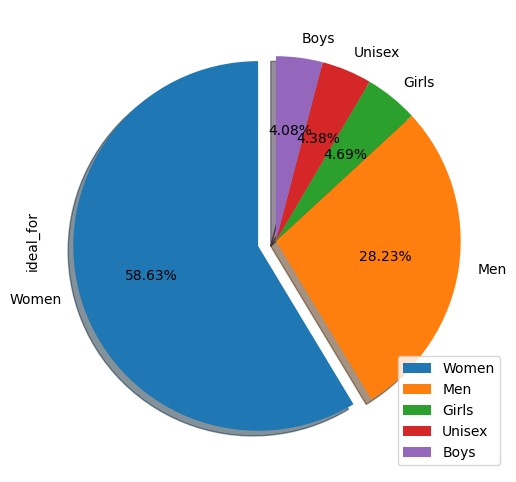

In [252]:
#This graph shows the difference in male,female,boys,girls and unisex  products using bar graph

plt.figure(figsize=[8, 6])
explode = (0.1, 0,0,0,0,)
myntra_merge_ratings["ideal_for"].value_counts().plot.pie(explode=explode, autopct="%.2f%%", shadow=True, startangle=90)
plt.legend()
plt.show()


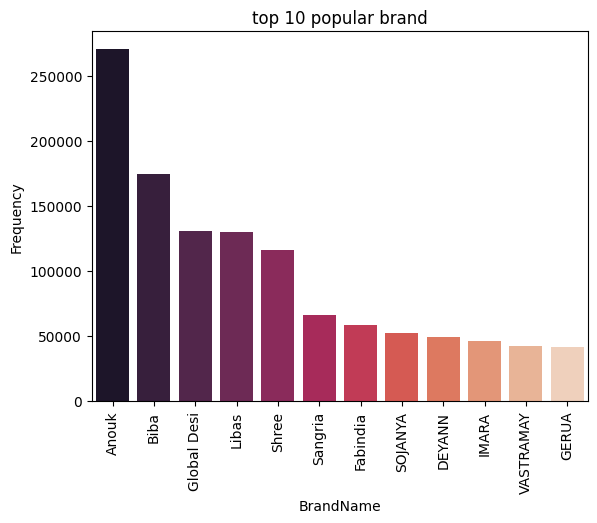

In [253]:
c=myntra_merge_ratings['brand'].value_counts()
c=c[0:12]
plt.title('top 10 popular brand')
plt.ylabel('Frequency')
plt.xlabel('BrandName')
ax=sns.barplot(x=c.index,y=c.values,palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

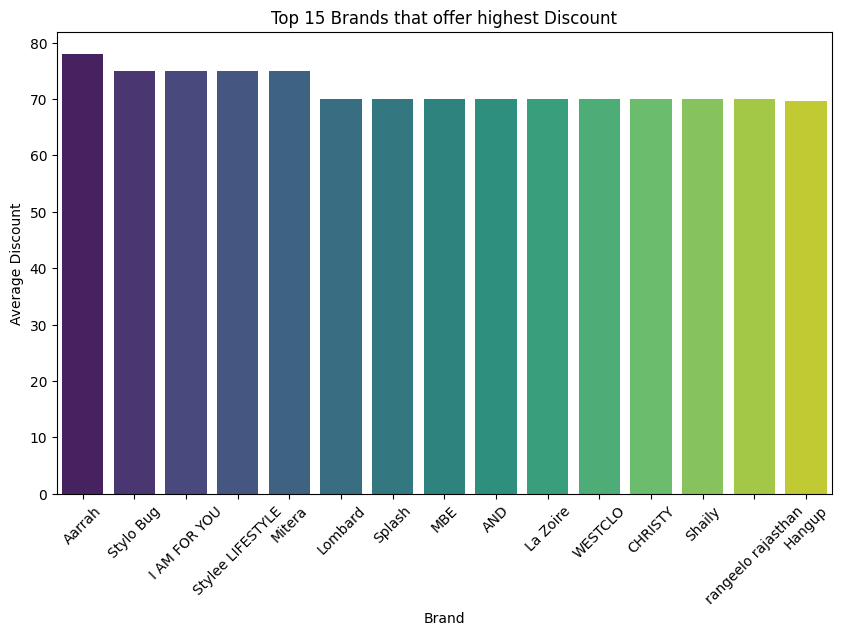

In [255]:
# Remove '%' sign and convert 'discount' column to numeric
myntra_merge_ratings['discount'] = myntra_merge_ratings['discount'].str.replace('%', '').astype(float)

# Grouping our data by brand and calculate the average discount
brand_discount = myntra_merge_ratings.groupby('brand')['discount'].mean().reset_index()

# Selecting the top 15 brands based on average discount they offer
top_15_brands = brand_discount.nlargest(15, 'discount')

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_15_brands, x='brand', y='discount', palette='viridis')

# Set labels and title
plt.xlabel('Brand')
plt.ylabel('Average Discount')
plt.title('Top 15 Brands that offer highest Discount')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)


plt.show()


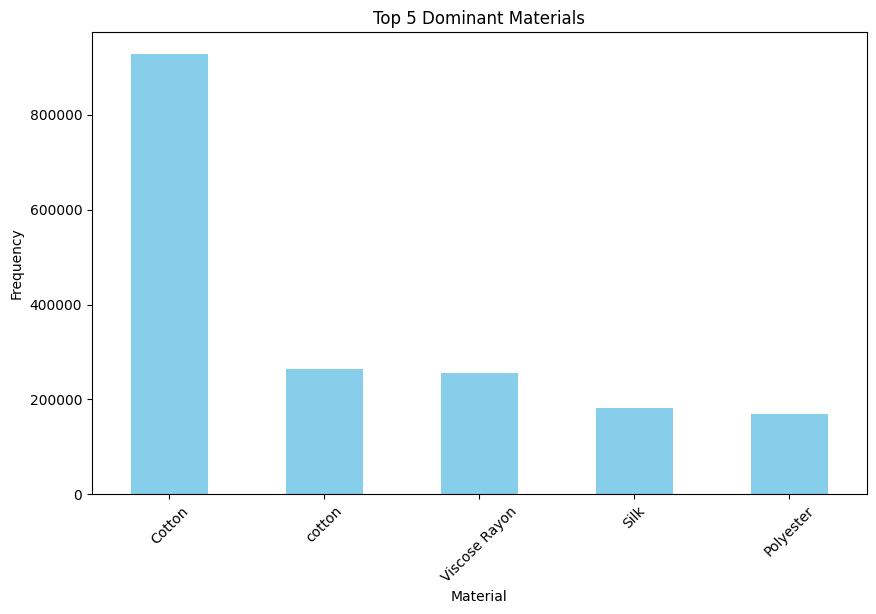

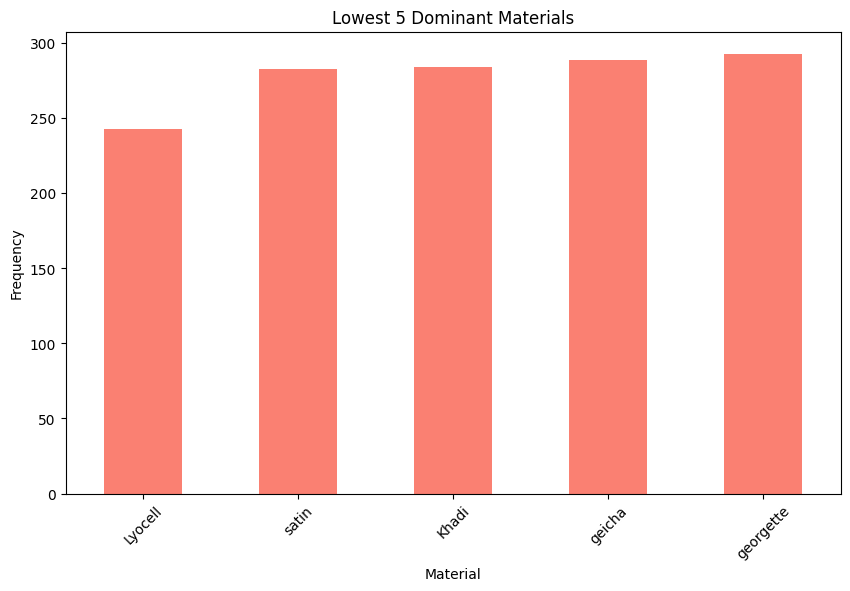

In [256]:
# most and least purchased fabrics on myntra

top_materials = myntra_merge_ratings['dominant_material'].value_counts().nlargest(5)
lowest_materials = myntra_merge_ratings['dominant_material'].value_counts().nsmallest(5)

# Plotting the top five materials
plt.figure(figsize=(10, 6))
top_materials.plot(kind='bar', color='skyblue')
plt.title('Top 5 Dominant Materials')
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



# Plotting the lowest five materials
plt.figure(figsize=(10, 6))
lowest_materials.plot(kind='bar', color='salmon')
plt.title('Lowest 5 Dominant Materials')
plt.xlabel('Material')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#it gives us the idea of most and least selling cloth material

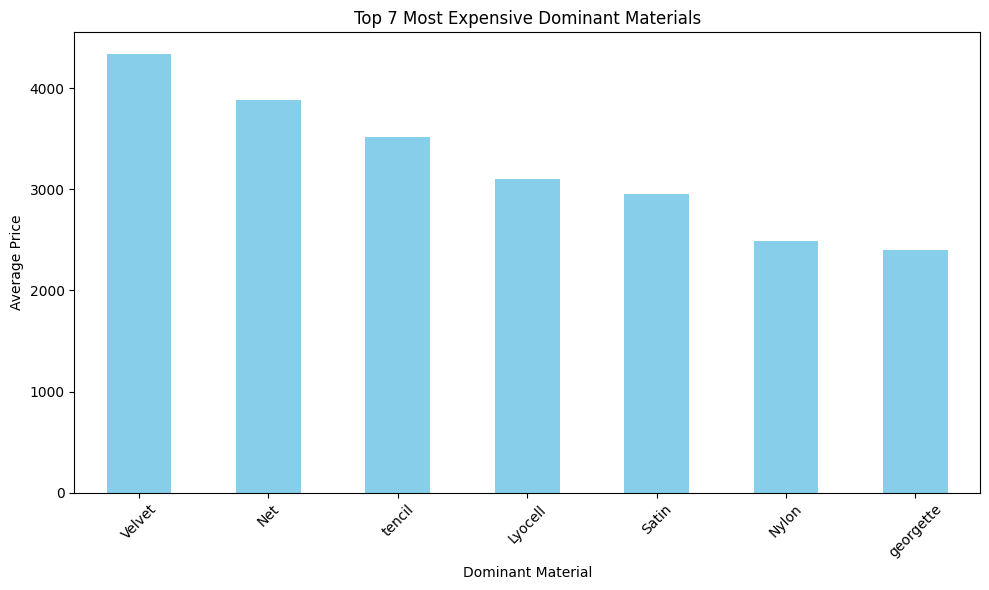

In [257]:
# most expensive fabric

material_prices = myntra_merge_ratings.groupby('dominant_material')['variant_price'].mean()

# Sorting the materials by price in descending order and picking the top 7
top_materials = material_prices.nlargest(7)

# now we plot the top 7 most expensive dominant materials
plt.figure(figsize=(10, 6))
top_materials.plot(kind='bar', color='skyblue')
plt.title('Top 7 Most Expensive Dominant Materials')
plt.xlabel('Dominant Material')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


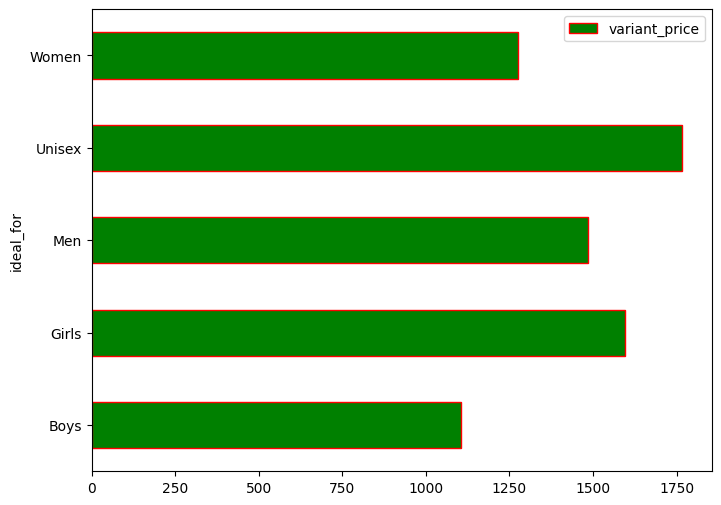

In [258]:
ax=plt.figure(figsize=[8,6])
myntra_merge_ratings.groupby('ideal_for').mean()['variant_price'].head(15).plot.barh(color='green',edgecolor='red')
plt.legend()

#it is found that unisex has high mean discount price

In [ ]:
sns.pairplot(myntra_merge_ratings,size=2.5)

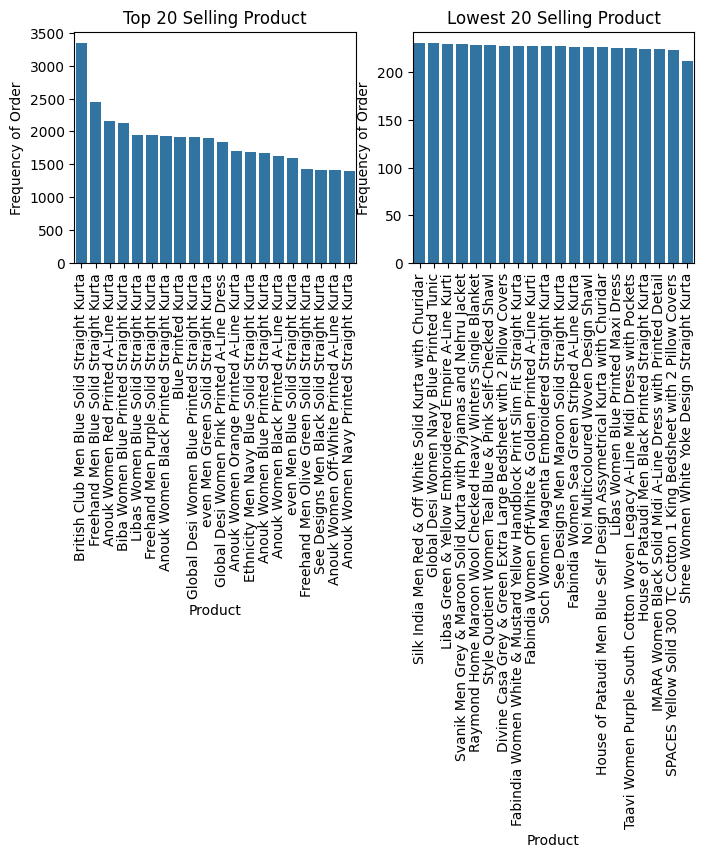

In [259]:
#Top selling Product
top_sel_prod=pd.DataFrame(myntra_merge_ratings['title'].value_counts().head(20))

top_ind=top_sel_prod.index
top_val=top_sel_prod.values.reshape(-1)

#lowest selling Product
bot_sel_prod=pd.DataFrame(myntra_merge_ratings['title'].value_counts().tail(20))

bot_ind= bot_sel_prod.index
bot_val=bot_sel_prod.values.reshape(-1)

#Graph
plt.figure(figsize=(8,3))


plt.subplot(121)
sns.barplot(x=top_ind,y=top_val);
plt.xticks(rotation=90)
plt.title('Top 20 Selling Product')
plt.xlabel('Product')
plt.ylabel('Frequency of Order')


plt.subplot(122)
sns.barplot(x=bot_ind,y=bot_val);
plt.xticks(rotation=90)
plt.title('Lowest 20 Selling Product')
plt.xlabel('Product')
plt.ylabel('Frequency of Order')

plt.show()

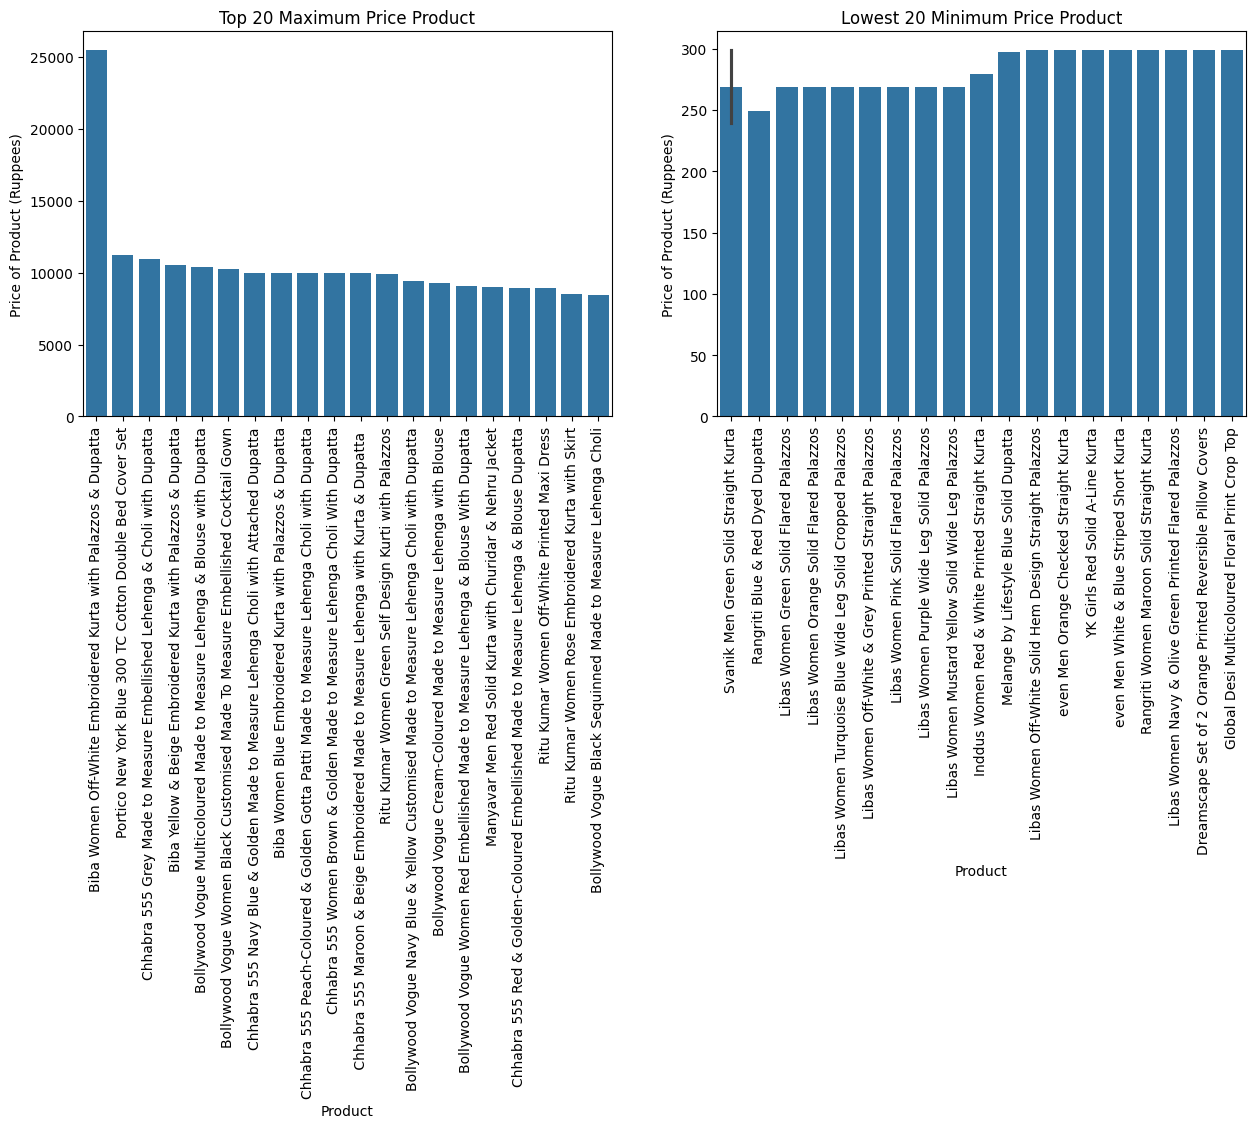

In [ ]:
hig_price=myntra_merge_ratings[['title','variant_price']].drop_duplicates().sort_values('variant_price',ascending=False).head(20)
lowe_price=myntra_merge_ratings[['title','variant_price']].drop_duplicates().sort_values('variant_price',ascending=True).head(20)

#Graph
plt.figure(figsize=(15,5))


plt.subplot(121)
sns.barplot(data=hig_price,x='title',y='variant_price');
plt.xticks(rotation=90)
plt.title('Top 20 Maximum Price Product')
plt.xlabel('Product')
plt.ylabel('Price of Product (Ruppees)')


plt.subplot(122)
sns.barplot(data=lowe_price,x='title',y='variant_price');
plt.xticks(rotation=90)
plt.title('Lowest 20 Minimum Price Product')
plt.xlabel('Product')
plt.ylabel('Price of Product (Ruppees)')

plt.show()

<Axes: xlabel='Star', ylabel='Count'>

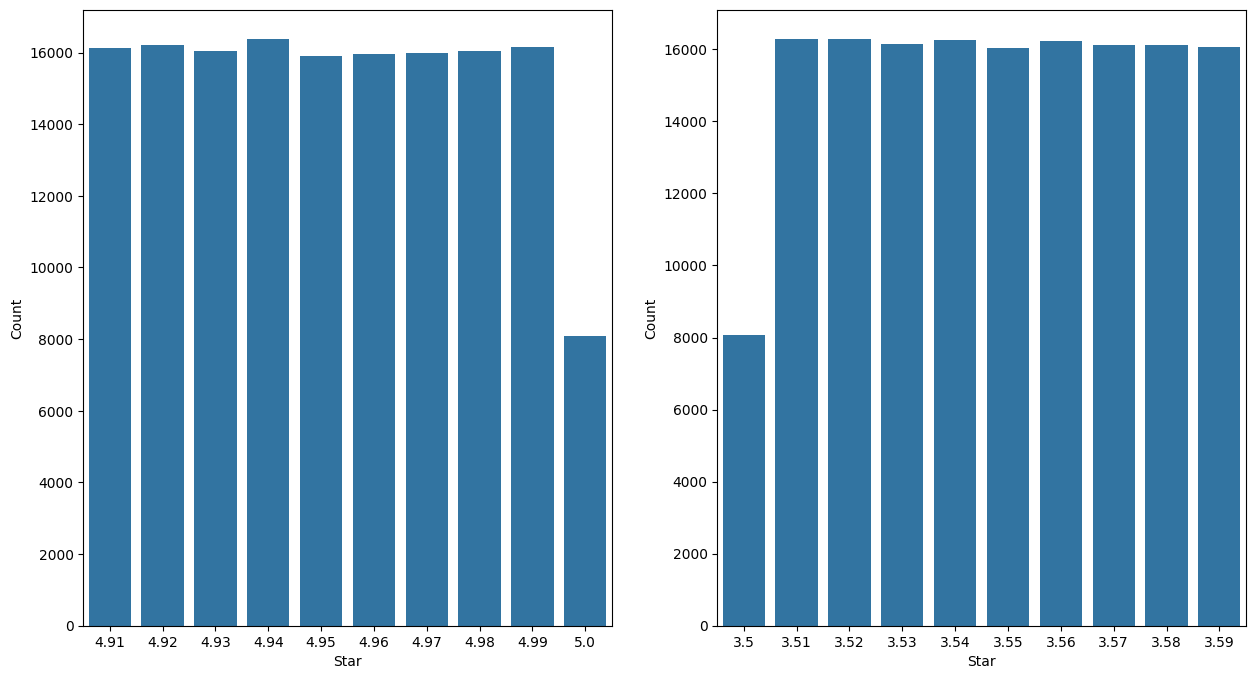

In [ ]:
#store the rating star
star_l=[i for i in myntra_merge_ratings.Rating]
star_s=list(set(star_l))

#now here we create a dict where key is star and value is count of star
star_dict={}
for i in (star_s):
    star_dict[i]=star_l.count(i)

#create dataframe for rating
rate=pd.DataFrame({'Star':star_dict.keys(),'Count':star_dict.values()})
rate=rate.sort_values('Star')

rate.drop(0,axis='index',inplace=True)#drop the 0 rating

top10_star=rate.tail(10)
bot10_star=rate.head(10)

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.barplot(data=top10_star,x='Star',y='Count')

plt.subplot(122)
sns.barplot(data=bot10_star,x='Star',y='Count')

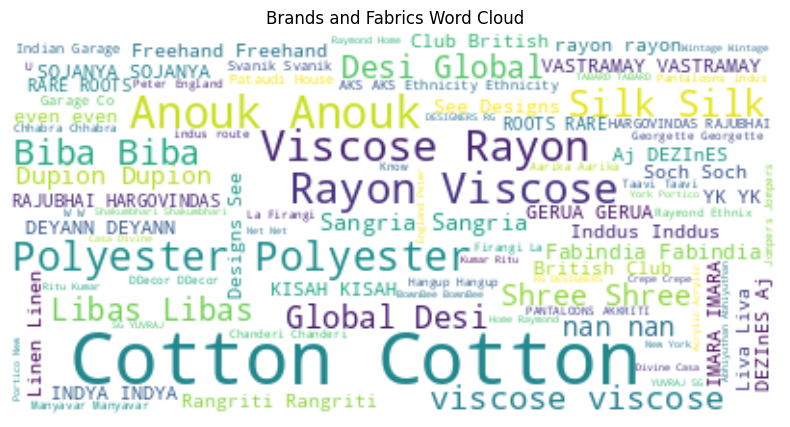

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenating all brand and fabric names into a single string
all_words = ' '.join(myntra_merge_ratings['brand'].astype(str)) + ' ' + ' '.join(myntra_merge_ratings['dominant_material'].astype(str))

# Creating a word cloud
wordcloud = WordCloud(background_color='white').generate(all_words)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Brands and Fabrics Word Cloud')
plt.axis('off')
plt.show()
